# PZ-9.2_Bipartited
## Двудольные графы, как инструмент моделирования социальных сетей

Основные возможности работы с двудольными графами в пакете NetworkX описаны в разделе 3.4 Bipartite документа NetworkX_reference.

Некоторые особенности анализа социальных данных, представленных двудольными графами, представлены в статье "Analyzing Affiliation Networks".

## Задание ПЗ-9.2

1. Тестовый граф test_9.2

   1.1 Создать и визуализировать граф на основе файла test_9.2.gml
   
   1.2 Распечатать общую справку о графе (nx.info()), информацию об узлах графа (nx.nodes(data=True)), о степенях узлов (nx.degree(G1)) и значение плотности рёбер
   
   1.3 Проверить, является ли граф двудольным, и определить множества узлов каждой доли графа

   1.4 Распечатать информацию о степенях узлов и значение плотности рёбер ДВУДОЛЬНОГО графа, сравнить с результатами п.1.2
         
   1.5 Написать функцию визуализации двудольного графа (узлы каждой доли имеют уникальную форму). Визуализировать граф test_9.2

2. Тестовый граф davis.dat.txt

   2.1 Создать и визуализировать граф на основе файла davis.dat.txt (папка Davis_southern_club_women). Идентификаторы узлов-людей и узлов-мероприятий должны соответствовать именам, представленным в файле.
   
   2.2 Распечатать общую справку о графе (nx.info()), информацию об узлах графа (nx.nodes(data=True)), о степенях узлов (nx.degree(G1)) и значение плотности рёбер
   
   2.3 Проверить, является ли граф двудольным, определить множества узлов каждой доли и визуализировать двудольный граф

   2.4 Распечатать информацию о степенях узлов и значение плотности рёбер ДВУДОЛЬНОГО графа, сравнить с результатами п.2.2
         
   2.5 Построить  и визуализировать граф-проекцию ДВУДОЛЬНОГО графа на множество людей, вес рёбер соответствует количеству общих мероприятий.
   
   2.6 Распечатать общую справку о графе-проекции, информацию о степенях узлов, плотности, средней длины пути, кратчайших расстояниях между людьми, характеристиках центральности.
      
   2.7. Выполнить выделение сообществ, обосновав выбор алгоритма. Визуализировать результат (размер узла пропорционален количеству мероприятий, которые посетил человек).

Результаты работы сохранить в файле PZ-9.2(N)04.12.20.ipynb , где N- порядковый номер по журналу. Файл должен содержать комментарии, поясняющие действия.

In [340]:
import igraph as ig
import leidenalg
import networkx as nx
import time
import re
from networkx.algorithms import bipartite
%matplotlib inline
import community
from IPython.display import display
import leidenalg

In [311]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);


In [234]:
G = nx.read_gml('test_9.2.gml')

In [235]:
nx.info(G)

'Name: fast_gnp_random_graph(7,7,0.4)\nType: Graph\nNumber of nodes: 14\nNumber of edges: 22\nAverage degree:   3.1429'

In [236]:
nx.bipartite.is_bipartite(G)

True

In [237]:
X, Y = bipartite.sets(G)
print(X)
print(Y)

{'2', '1', '6', '5', '3', '0', '4'}
{'12', '10', '13', '8', '9', '11', '7'}


In [238]:
#степени вершин двудольного графа
print([G.degree[i] for i in (list(X))])
print([G.degree[i] for i in (list(Y))])

[4, 3, 3, 5, 1, 3, 3]
[5, 3, 3, 3, 3, 3, 2]


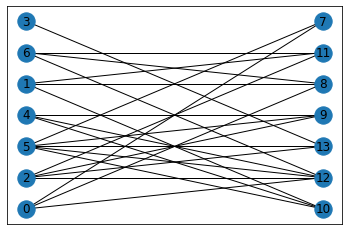

In [239]:
nx.draw_networkx(
    G,
    pos = nx.drawing.layout.bipartite_layout(G, X))

## часть 2

In [312]:
with open('davis.dat.txt') as f:
    full = f.read()

In [313]:
women = re.findall('(\w+)\s?', re.sub("\n", " ", re.findall("ROW LABELS:([\w\n]*)COLUMN LABELS", full)[0]))
clubs = re.findall("(E[0-9]{1,2})", full)
matrix = []
for i in range(len(re.findall('\s([0,1\s]*?)\n', full))):
    matrix.append(re.sub("\s", "", re.findall('\s([0,1\s]*?)\n', full)[i]))
matrix[0]

'11111101100000'

In [261]:
G2=nx.Graph()
for i in range(len(women)):
    for j in range(len(clubs)):
        if matrix[i][j] == '1':
            G2.add_edge(women[i], clubs[j])


<IPython.core.display.Javascript object>


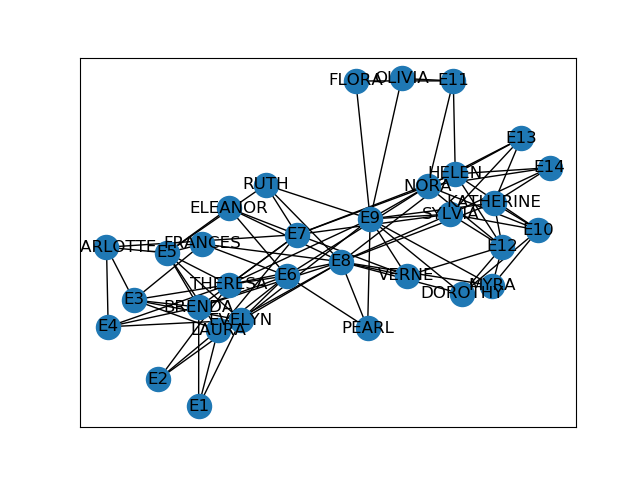

In [264]:
plot_graph(G2)

In [252]:
nx.info(G2)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 93\nAverage degree:   5.8125'

In [253]:
G2.degree

DegreeView({'EVELYN': 8, 'E1': 3, 'E2': 3, 'E3': 6, 'E4': 4, 'E5': 8, 'E6': 8, 'E8': 14, 'E9': 12, 'LAURA': 7, 'E7': 10, 'THERESA': 8, 'BRENDA': 7, 'CHARLOTTE': 4, 'FRANCES': 4, 'ELEANOR': 4, 'PEARL': 3, 'RUTH': 4, 'VERNE': 4, 'E12': 7, 'MYRA': 4, 'E10': 6, 'KATHERINE': 6, 'E13': 4, 'E14': 4, 'SYLVIA': 7, 'NORA': 8, 'E11': 4, 'HELEN': 7, 'DOROTHY': 4, 'OLIVIA': 2, 'FLORA': 2})

In [254]:
nx.nodes(G2)

NodeView(('EVELYN', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9', 'LAURA', 'E7', 'THERESA', 'BRENDA', 'CHARLOTTE', 'FRANCES', 'ELEANOR', 'PEARL', 'RUTH', 'VERNE', 'E12', 'MYRA', 'E10', 'KATHERINE', 'E13', 'E14', 'SYLVIA', 'NORA', 'E11', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA'))

In [271]:
#плотность графа
(2*len(G2.edges))/(len(G2.nodes)*(len(G2.nodes)-1))

0.1875

In [255]:
nx.bipartite.is_bipartite(G2)

True

In [262]:
A, B = bipartite.sets(G2)
print(A)
print(B)

{'FRANCES', 'BRENDA', 'NORA', 'ELEANOR', 'CHARLOTTE', 'VERNE', 'THERESA', 'EVELYN', 'KATHERINE', 'MYRA', 'RUTH', 'HELEN', 'PEARL', 'SYLVIA', 'LAURA', 'FLORA', 'OLIVIA', 'DOROTHY'}
{'E4', 'E5', 'E10', 'E9', 'E12', 'E7', 'E13', 'E14', 'E2', 'E1', 'E6', 'E3', 'E11', 'E8'}


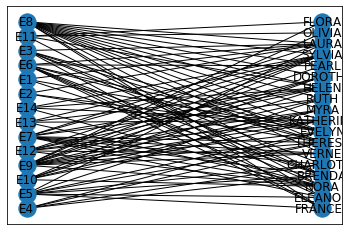

In [263]:
nx.draw_networkx(
    G2,
    pos = nx.drawing.layout.bipartite_layout(G2, B))

In [292]:
list(G2.edges())[0][0] in women

True

In [314]:
d_women = {}
pair = []
for i in women:
    d_women[i] = []
for i in range(len(women)-1):
        for j in range(len(women)-i - 1):
            temp = []
            temp.append(women[i])
            temp.append(women[j+i+1])
            pair.append(temp)
    
for i in range(len(list(G2.edges()))):
    if list(G2.edges())[i][0] in women:
        d_women[list(G2.edges())[i][0]].append(list(G2.edges())[i][1])
    if list(G2.edges())[i][1] in women:
        d_women[list(G2.edges())[i][1]].append(list(G2.edges())[i][0])

for i in range(len(pair)):
    pair[i].append(len(list(set(d_women[pair[i][0]]).intersection(set(d_women[pair[i][1]])))))



In [328]:
pair

[['EVELYN', 'LAURA', 6],
 ['EVELYN', 'THERESA', 7],
 ['EVELYN', 'BRENDA', 6],
 ['EVELYN', 'CHARLOTTE', 3],
 ['EVELYN', 'FRANCES', 4],
 ['EVELYN', 'ELEANOR', 3],
 ['EVELYN', 'PEARL', 3],
 ['EVELYN', 'RUTH', 3],
 ['EVELYN', 'VERNE', 2],
 ['EVELYN', 'MYRA', 2],
 ['EVELYN', 'KATHERINE', 2],
 ['EVELYN', 'SYLVIA', 2],
 ['EVELYN', 'NORA', 2],
 ['EVELYN', 'HELEN', 1],
 ['EVELYN', 'DOROTHY', 2],
 ['EVELYN', 'OLIVIA', 1],
 ['EVELYN', 'FLORA', 1],
 ['LAURA', 'THERESA', 6],
 ['LAURA', 'BRENDA', 6],
 ['LAURA', 'CHARLOTTE', 3],
 ['LAURA', 'FRANCES', 4],
 ['LAURA', 'ELEANOR', 4],
 ['LAURA', 'PEARL', 2],
 ['LAURA', 'RUTH', 3],
 ['LAURA', 'VERNE', 2],
 ['LAURA', 'MYRA', 1],
 ['LAURA', 'KATHERINE', 1],
 ['LAURA', 'SYLVIA', 2],
 ['LAURA', 'NORA', 2],
 ['LAURA', 'HELEN', 2],
 ['LAURA', 'DOROTHY', 1],
 ['LAURA', 'OLIVIA', 0],
 ['LAURA', 'FLORA', 0],
 ['THERESA', 'BRENDA', 6],
 ['THERESA', 'CHARLOTTE', 4],
 ['THERESA', 'FRANCES', 4],
 ['THERESA', 'ELEANOR', 4],
 ['THERESA', 'PEARL', 3],
 ['THERESA', 'RUTH',

<IPython.core.display.Javascript object>


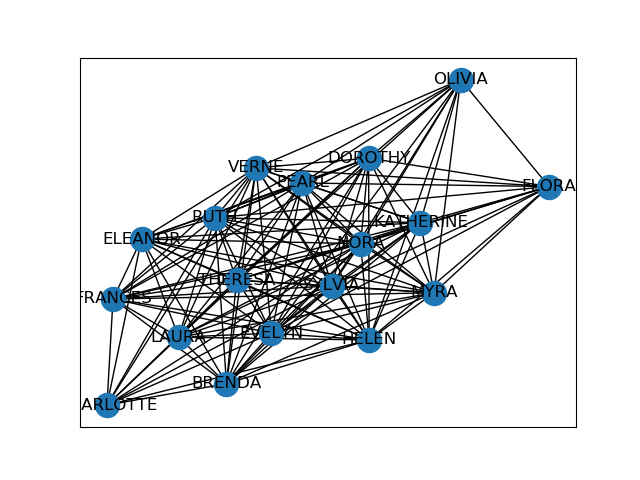

C:\Users\79771\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [329]:
G3 = nx.Graph()
for i in pair:
    if i[2] != 0:
        G3.add_edge(i[0], i[1], weight=i[2])
plot_graph(G3)

In [330]:
nx.info(G3)

'Name: \nType: Graph\nNumber of nodes: 18\nNumber of edges: 139\nAverage degree:  15.4444'

In [331]:
G3.degree

DegreeView({'EVELYN': 17, 'LAURA': 15, 'THERESA': 17, 'BRENDA': 15, 'CHARLOTTE': 11, 'FRANCES': 15, 'ELEANOR': 15, 'PEARL': 16, 'RUTH': 17, 'VERNE': 17, 'MYRA': 16, 'KATHERINE': 16, 'SYLVIA': 17, 'NORA': 17, 'HELEN': 17, 'DOROTHY': 16, 'OLIVIA': 12, 'FLORA': 12})

In [332]:
G3.nodes

NodeView(('EVELYN', 'LAURA', 'THERESA', 'BRENDA', 'CHARLOTTE', 'FRANCES', 'ELEANOR', 'PEARL', 'RUTH', 'VERNE', 'MYRA', 'KATHERINE', 'SYLVIA', 'NORA', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA'))

In [333]:
#плотность графа
(2*len(G3.edges))/(len(G3.nodes)*(len(G3.nodes)-1))

0.9084967320261438

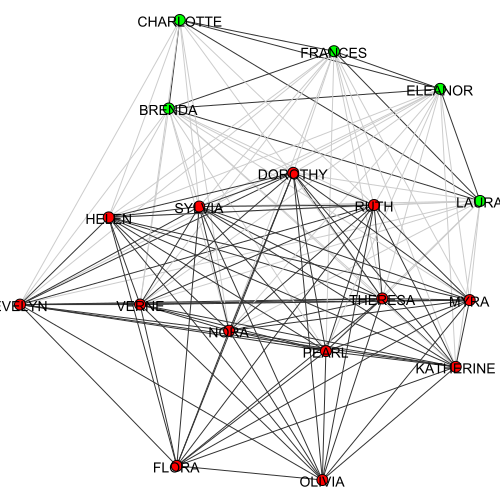

In [343]:
g3 = ig.Graph.from_networkx(G3)
g3.vs["label"] = g3.vs['_nx_name']
community = ig.Graph.community_leading_eigenvector(g3)
display(ig.plot(community, layout = g3.layout('lgl'), vertex_size = 11, bbox = (500, 500)))